In [218]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates

In [219]:
data_2005 = pd.read_csv('../data/data_2005.csv', skiprows=[0,1,2,3])
data_2005.columns = data_2005.columns.str.replace(' ', '')

In [220]:
data_2005.columns

Index(['Date', 'Week', 'Min', 'Max', 'Avg', 'AvgII', 'Dev', 'Dev%', 'Rain',
       'Flag', 'DD', 'DDSum', 'Source', 'Trap1_Count', 'Trap1_Trap1Sum',
       'Trap1_%', 'Trap2_Count', 'Trap2_Sum', 'Trap2_%', 'Trap3_Count',
       'Trap3_Sum', 'Trap3_%', 'Percent_Sum', 'Percent_Avg', 'Percent_%'],
      dtype='object')

In [221]:
# prepared_data = data_2005[['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count']].copy()
# needed_columns = ['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count']

# df = data_2005.filter(['Date', 'Avg', 'Trap1_Count','Trap2_Count','Trap3_Count'], axis=1)
# df = data_2005.filter(['Date', 'Avg', 'Rain', 'DD','DDSum', 'Trap1_Count','Trap2_Count','Trap3_Count'])

df = data_2005.filter(['Date', 'Avg', 'Rain', 'DD', 'DDSum', 'Trap1_Count','Trap2_Count'])

In [222]:
# prepared_data['Trap3_Count'].count()

In [223]:
# df.update(df[needed_columns[2:]].fillna(0))
df["Trap1_Count"].where(df["Trap1_Count"] == 0.0, other=(df["Trap1_Count"].fillna(method='ffill') + df["Trap1_Count"].fillna(method='bfill'))/2, inplace=True)
df["Trap2_Count"].where(df["Trap2_Count"] == 0.0, other=(df["Trap2_Count"].fillna(method='ffill') + df["Trap2_Count"].fillna(method='bfill'))/2, inplace=True)
# df["Trap3_Count"].where(df["Trap3_Count"] == 0.0, other=(df["Trap3_Count"].fillna(method='ffill') + df["Trap3_Count"].fillna(method='bfill'))/2, inplace=True)
df = df.fillna(0)
df["Trap1_Sum"] = df["Trap1_Count"].cumsum()
df["Trap2_Sum"] = df["Trap2_Count"].cumsum()
# df["Trap3_Sum"] = df["Trap3_Count"].cumsum()

In [224]:
# df['sum_trap'] = df[needed_columns[2:]].sum(axis=1)
# df['Sum_trap'] = df[["Trap1_Count", "Trap2_Count", "Trap3_Count"]].sum(axis=1)
df['Sum_trap'] = df[["Trap1_Count", "Trap2_Count"]].sum(axis=1)

In [225]:
df.ne(0).idxmax().to_frame('pos').assign(val=lambda d: df.lookup(d.pos, d.index))

/tmp/ipykernel_31477/3631092531.py:1: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  df.ne(0).idxmax().to_frame('pos').assign(val=lambda d: df.lookup(d.pos, d.index))


,pos,val
Date,0,1/1/2005
Avg,0,4.01
Rain,0,5.80
DD,0,-
DDSum,0,-
Trap1_Count,140,2.0
Trap2_Count,142,1.0
Trap1_Sum,140,2.0
Trap2_Sum,142,1.0
Sum_trap,140,2.0


In [226]:
df = df.loc[120:284]
# df = df.loc[120:140]

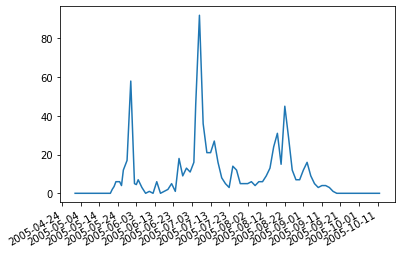

In [227]:
import matplotlib.dates as mdates
x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in df['Date']]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.plot(x_values,df['Sum_trap'])
plt.gcf().autofmt_xdate()
plt.show()

In [228]:
df.loc[140:284]

,Date,Avg,Rain,DD,DDSum,Trap1_Count,Trap2_Count,Trap1_Sum,Trap2_Sum,Sum_trap
140,5/21/2005,14.09,-,4.09,58.89,2.0,0.0,2.0,0.0,2.0
141,5/22/2005,16.25,-,6.25,65.14,3.5,0.0,5.5,0.0,3.5
142,5/23/2005,17.48,-,7.48,72.62,5.0,1.0,10.5,1.0,6.0
143,5/24/2005,13.79,-,3.79,76.41,3.5,2.5,14.0,3.5,6.0
144,5/25/2005,14.72,-,4.72,81.13,2.0,4.0,16.0,7.5,6.0
...,...,...,...,...,...,...,...,...,...,...
280,10/8/2005,10.29,-,0.29,895.14,0.0,0.0,780.5,752.5,0.0
281,10/9/2005,8.98,-,-,895.14,0.0,0.0,780.5,752.5,0.0
282,10/10/2005,9.86,-,-,895.14,0.0,0.0,780.5,752.5,0.0
283,10/11/2005,7.43,-,-,895.14,0.0,0.0,780.5,752.5,0.0


In [230]:
df.index[df['Date'] == '10/12/2005']

Int64Index([284], dtype='int64')

In [231]:
new_df = df[['Date', 'Avg','DD','DDSum', 'Rain','Sum_trap']].copy()

In [232]:
new_df.to_csv("../data/forModels/clean_data_2005.csv",index=False)

In [233]:
f = pd.read_csv("../data/forModels/clean_data_2005.csv")

In [234]:
f

,Date,Avg,DD,DDSum,Rain,Sum_trap
0,5/1/2005,12.93,2.93,32.13,-,0.0
1,5/2/2005,15.07,5.07,37.21,-,0.0
2,5/3/2005,16.30,6.30,43.51,3.00,0.0
3,5/4/2005,13.23,3.23,46.74,6.10,0.0
4,5/5/2005,9.33,-,46.74,23.00,0.0
...,...,...,...,...,...,...
160,10/8/2005,10.29,0.29,895.14,-,0.0
161,10/9/2005,8.98,-,895.14,-,0.0
162,10/10/2005,9.86,-,895.14,-,0.0
163,10/11/2005,7.43,-,895.14,-,0.0
